In [68]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import fbeta_score
import model_utils as model_utils
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

import json
# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)


with open('best_config.json') as json_data_file:
    config = json.load(json_data_file)[0]
print(config)
seed = int(config['seed'])
test_size = config['test_size']

dataset = pd.read_csv("datasets/targetencoder_dataset.csv")
display(dataset.head(n = 5))

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)


{'seed': 134.0, 'test_size': 0.2, 'impute': 0.0}


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,0.413632,0.457947,0.404291,0.422006,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.388499,0.416195,0.420014,0.271184,0.168226,0.457652,0.266635,0.456139,0.4024,0
1,0.367341,0.457947,0.447575,0.455866,0.43569,0.371084,0.459542,0.425020,0.420733,0.436371,...,0.388499,0.375220,0.366720,0.433927,0.281359,0.457652,0.459141,0.456139,0.4024,0
2,0.557791,0.457947,0.488072,0.455866,0.43569,0.564257,0.532725,0.425020,0.420733,0.436371,...,0.388499,0.549517,0.558897,0.433927,0.616036,0.457652,0.459141,0.456139,0.4024,0
3,0.409106,0.457947,0.404291,0.455866,0.43569,0.445723,0.532725,0.526102,0.420733,0.436371,...,0.450952,0.407647,0.447220,0.433927,0.616036,0.457652,0.459141,0.456139,0.4024,1
4,0.413632,0.457947,0.404291,0.455866,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.388499,0.416195,0.420014,0.271184,0.168226,0.457652,0.266635,0.456139,0.4024,0


In [75]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = seed, stratify=labels)

# Show the results of the split
print("features_final set has {} samples.".format(features.shape[0]))
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


features_final set has 281311 samples.
Training set has 225048 samples.
Testing set has 56263 samples.


# Tuning Models

## Tuning PassiveAggressiveClassifier

('PassiveAggressiveClassifier',) tuned in 7.799983263015747 seconds.
Unoptimized model
------
F-score: 0.8620

Optimized Model
------
Final F-score: 0.8730


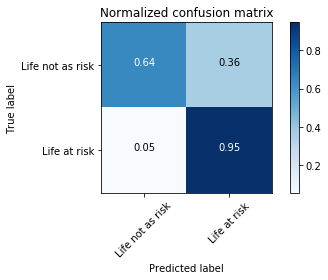

In [76]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state = seed)

clfParameters = {    
  'fit_intercept':[True, False],
  #'max_iter':[1000, 2000],
  'early_stopping':[True, False],
  'warm_start':[True, False],
  'class_weight': ['balanced'],
  'average': [True, False] 
}

rf_classifier, default_rf_score, tuned_rf_score, cnf_rf_matrix = model_utils.tune_classifier(clf, clfParameters, X_train, X_test, y_train, y_test)

model_utils.plot_confusion_matrix(cnf_rf_matrix, classes=['Life not as risk', 'Life at risk'], normalize = True)
print("Unoptimized model\n------")
print("F-score: {:.4f}".format(default_rf_score))
print("\nOptimized Model\n------")
print("Final F-score: {:.4f}".format(tuned_rf_score))
#joblib.dump(rf_classifier, 'rf_classifier.joblib')


## Tuning MLPClassifier

In [82]:

from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(random_state = seed)

nnParameters = {
  #'hidden_layer_sizes':[50, 100, 200],
  #'activation' :['identity', 'logistic', 'tanh', 'relu'],
  #'solver': ['lbfgs', 'sgd', 'adam'],
  #'batch_size': [700],
  #'early_stopping': [True]  

}

nn_classifier, default_nn_score, tuned_nn_score, matrix = model_utils.tune_classifier(nn_classifier, nnParameters,  X_train, X_test, y_train, y_test)

#model_utils.plot_confusion_matrix(cnf_ada_matrix, classes=['Life not as risk', 'Life at risk'], normalize = True)
print("Unoptimized model\n------")
print("F-score: {:.4f}".format(default_nn_score))
print("\nOptimized Model\n------")
print("Final F-score: {:.4f}".format(tuned_nn_score))

#joblib.dump(ada_classifier, 'ada_classifier.joblib')



('MLPClassifier',) tuned in 1721.4086649417877 seconds.
Unoptimized model
------
F-score: 0.8419

Optimized Model
------
Final F-score: 0.8419


## Tuning GradientBoostingClassifier


In [78]:

'''
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer

rf_classifier = GradientBoostingClassifier()

rfParameters = { 
  'loss': ['deviance', 'exponential'],
  #'learning_rate':[0.1, 0.5, 1],
  'n_estimators':[50, 100, 200],
  #'subsample': [0.5, 1], 
  'criterion':['friedman_mse', 'mse', 'mae'],
  #'min_samples_split': sp_randint(2, 4),
  #'min_samples_leaf': sp_randint(2, 4),
  #'max_depth':sp_randint(5, 30),
  #'max_features':['auto', 'sqrt', 'log2', None] 
}

rf_classifier, default_rf_score, tuned_rf_score = model_utils.tune_classifier(rf_classifier, rfParameters, X_train, X_test, y_train, y_test)

#model_utils.plot_confusion_matrix(cnf_rf_matrix, classes=['Life not as risk', 'Life at risk'], normalize = True)
print("Unoptimized model\n------")
print("F-score on testing data: {:.4f}".format(default_rf_score))
print("\nOptimized Model\n------")
print("Final F-score on the testing data: {:.4f}".format(tuned_rf_score))
#joblib.dump(rf_classifier, 'rf_classifier.joblib') )
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\n\nfrom scipy.stats import randint as sp_randint\nfrom sklearn.metrics import make_scorer\n\nrf_classifier = GradientBoostingClassifier()\n\nrfParameters = { \n  \'loss\': [\'deviance\', \'exponential\'],\n  #\'learning_rate\':[0.1, 0.5, 1],\n  \'n_estimators\':[50, 100, 200],\n  #\'subsample\': [0.5, 1], \n  \'criterion\':[\'friedman_mse\', \'mse\', \'mae\'],\n  #\'min_samples_split\': sp_randint(2, 4),\n  #\'min_samples_leaf\': sp_randint(2, 4),\n  #\'max_depth\':sp_randint(5, 30),\n  #\'max_features\':[\'auto\', \'sqrt\', \'log2\', None] \n}\n\nrf_classifier, default_rf_score, tuned_rf_score = model_utils.tune_classifier(rf_classifier, rfParameters, X_train, X_test, y_train, y_test)\n\n#model_utils.plot_confusion_matrix(cnf_rf_matrix, classes=[\'Life not as risk\', \'Life at risk\'], normalize = True)\nprint("Unoptimized model\n------")\nprint("F-score on testing data: {:.4f}".format(default_rf_score))\nprint("\nOptimized Mo

# Stacking
## Stacking with to best classifiers

F-score on validation data: 0.8048


StackingClassifier(average_probas=False,
          classifiers=[PassiveAggressiveClassifier(C=1.0, average=False, class_weight='balanced',
              early_stopping=True, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=134, shuffle=True, tol=None,
            ...e=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)],
          meta_classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=134, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=True, 

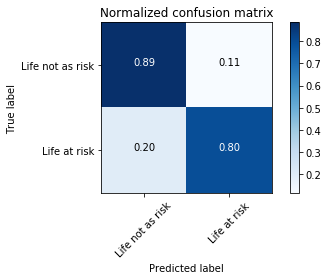

In [83]:


sclf_two, sclf_score = model_utils.get_stack_two(rf_classifier, nn_classifier, X_train, X_test, y_train, y_test, seed)

joblib.dump(sclf_two, 'sclf_two.joblib') 

model_utils.model_validation('sclf_two.joblib', X_test, y_test)


## Stacking with all classifiers

In [80]:
'''
sclf_all, sclf_all_score = model_utils.get_stack_all(rf_classifier, ada_classifier, gauss_classifier, X_train, X_test, y_train, y_test, seed)

joblib.dump(sclf_all, 'sclf_all.joblib') 

model_utils.model_validation('sclf_all.joblib', X_test, y_test)
'''

"\nsclf_all, sclf_all_score = model_utils.get_stack_all(rf_classifier, ada_classifier, gauss_classifier, X_train, X_test, y_train, y_test, seed)\n\njoblib.dump(sclf_all, 'sclf_all.joblib') \n\nmodel_utils.model_validation('sclf_all.joblib', X_test, y_test)\n"